In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open("../non_book_chapter_data.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,page_idx,filepath,toc,dedication,titlepage,paragraph_stats
0,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,True,[]
1,1,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,"[90, 8, 35, 27, 1, 13]"
2,2,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,[159]
3,3,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,"[38, 195, 1, 20, 89, 151, 1, 73]"
4,4,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,[548]


In [2]:
df["summed_wordcount"] = df["paragraph_stats"].apply(sum)
df.head()

,page_idx,filepath,toc,dedication,titlepage,paragraph_stats,summed_wordcount
0,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,True,[],0
1,1,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,"[90, 8, 35, 27, 1, 13]",174
2,2,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,[159],159
3,3,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,"[38, 195, 1, 20, 89, 151, 1, 73]",568
4,4,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,False,[548],548


92244


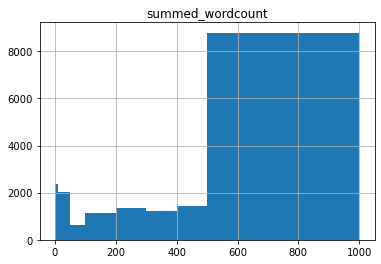

In [3]:
print(len(df))
df.hist(column="summed_wordcount", bins=[0, 10, 50, 100, 200, 300, 400, 500, 1000])
plt.show()

In [5]:
len(df[df["page_idx"] == 0])

5544

In [6]:
df.query("toc == True").sort_values("summed_wordcount", ascending=False).head()

,page_idx,filepath,toc,dedication,titlepage,paragraph_stats,summed_wordcount
22937,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,True,False,False,"[1, 38, 8, 12, 4, 4, 4, 31, 1, 3, 2, 4, 1, 5, ...",206320
22400,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,True,False,True,"[1, 161, 166, 7, 130, 158, 162, 187, 10, 106, ...",110896
8146,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,True,False,False,"[62, 25, 110, 33, 40, 36, 74, 16, 134, 98, 89,...",47676
26192,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,True,False,False,"[12, 88, 141, 79, 63, 66, 52, 95, 160, 152, 11...",41060
40352,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,True,False,False,"[280, 23, 25, 154, 5, 76, 69, 127, 101, 51, 49...",21509


In [7]:
print(list(df.query("dedication == True").sort_values("summed_wordcount", ascending=False)["filepath"])[0])
df.query("dedication == True").sort_values("summed_wordcount", ascending=False).head()

/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Module IAS/Master's Thesis/gutenberg-edition16/beardsle/venustan/dedication.html


,page_idx,filepath,toc,dedication,titlepage,paragraph_stats,summed_wordcount
3971,1,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,True,False,"[76, 2, 128, 40, 102, 220, 217, 148]",933
82745,1,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,True,False,"[7, 2, 4, 97, 7]",117
90610,1,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,True,False,"[3, 10, 89, 7]",109
24282,1,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,True,False,"[1, 92, 2]",95
29248,1,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,True,False,[91],91


In [8]:
df.query("titlepage == True").sort_values("summed_wordcount", ascending=False).head()

,page_idx,filepath,toc,dedication,titlepage,paragraph_stats,summed_wordcount
14739,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,True,"[7, 4, 186, 145, 110, 72, 307, 110, 230, 41, 1...",155949
15136,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,True,"[339, 511, 583, 304, 177, 273, 500, 165, 375, ...",120118
22400,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,True,False,True,"[1, 161, 166, 7, 130, 158, 162, 187, 10, 106, ...",110896
14786,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,True,"[1, 4, 325, 201, 415, 211, 191, 53, 433, 253, ...",90545
1833,0,/mnt/c/Users/Moritz Lahann/Desktop/STUDIUM/Mod...,False,False,True,"[179, 422, 233, 141, 163, 99, 225, 79, 198, 92...",64686


5544
1921
1887


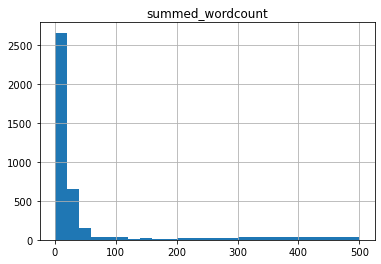

In [9]:
first_pages = df[df["page_idx"] == 0]
print(len(first_pages))
print(len(first_pages[first_pages["summed_wordcount"] > 200]))
print(len(first_pages[first_pages["summed_wordcount"] > 300]))
first_pages.hist(column="summed_wordcount", bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 400, 500])
plt.show()

In [10]:
for wc in first_pages["summed_wordcount"]:
    print(wc)

0
3
29
10
6
6
16
0
15
6753
8
45
1
11
11
17
1
0
15
15
8
3390
6
7
6
7
7
7
7
18
8
2
7
0
0
10
15
3
7
6
6
12
0
193
2
2
6
9839
12
6
0
3063
0
12
0
31
15
14
25
2
13
8
179
6
9
10
1
20
2780
3
6
6514
1676
2730
0
3
2018
7
16
5
697
0
12
17
8
4932
4
3
1
7868
39693
0
8774
15191
12860
0
4185
12784
253
78
13
31
27
1
9038
4
2
2
13
37
37
37
37
0
64686
5
0
0
0
0
0
0
0
0
0
0
4427
0
29
5
5
5
5
0
0
0
0
0
0
0
7723
1
1404
23
9
7
305
4
5
13
28
636
1006
4
0
15
11
8
0
16
6
13
42
3
18
11
10
11
11
10
483
3
1018
2
7093
15278
4
4
0
0
19
22037
4
13
66
4
8
4
9
19
0
6
5
5247
5
8
14
0
6
27
15
0
10
21
9
4
10
2
0
0
4
60
10
10
22876
3
4
7388
0
3728
13972
0
9
26
7
17
0
9
24
3
7022
4569
7
49
19
15
7
28
28
22
8
29
27
8
8
19
7
7
7
7
7
10
6
8
11
8
21
814
6
75
86
4278
0
10
10
10
0
8
26
7
63
96
3179
29
40
20
34
3
3117
17
9
5
2
4164
9
6
5
460
42
17
82
10
18303
138
7
13
40
5145
13
174
9
4
58
13
15
20
17
1
3
1662
1
186
1885
1859
0
4459
6317
2568
2402
47
1190
2104
6950
425
2527
6326
4012
7304
0
1208
7322
1343
2424
2320
3084
3280
3043
